In [40]:
import numpy as np

In [41]:
detector_array = np.zeros((500, 500))
#this shows a 2 dimensional array with 500 cells in each direction

In [42]:
print(detector_array)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [43]:
pixel_edge_length = 15 #microns
pixel_half_length = (pixel_edge_length / 2)
number_of_pixels = 500
number_of_pixel_x = 500
number_of_pixel_y = 500
electrons_per_photon = 1500 #electrons
#center of each pixel can be calculated by multiplying it's i or j value by 15 and adding 7.5
def bottom_left_of_pixel():
    pixel_corner_i = i * pixel_edge_length
    pixel_corner_j = j * pixel_edge_length

In [44]:
#i = the row value of pixel
#j = the column value of pixel
#horz_d= horizontal distance from bottom left
#vert_d= vertical distance from bottom left
def center_of_pixel(pixel_edge_length, i, j):
    horz_d = (i * pixel_edge_length) + pixel_half_length
    vert_d = (j * pixel_edge_length) + pixel_half_length
    #print("pixel: [" + str(i) + ", " + str(j) + "], center of pixel: [" + str(horz_d) + ", " + str(vert_d) + "] microns.")
for i in range(len(detector_array)):
    for j in range(len(detector_array)):
        center_of_pixel(pixel_edge_length, i, j)   

In [104]:
import random
x_rand = random.random() * pixel_edge_length * number_of_pixels #microns
y_rand = random.random() * pixel_edge_length * number_of_pixels #microns
print("photon hit at [x,y] = [" + str(x_rand) + ", " + str(y_rand) + "] in microns")

photon hit at [x,y] = [7282.665890024591, 6258.287144829522] in microns


In [105]:
 #to do: which center of pixel(s) is closest to the random generated values
#calculate percentage of cloud in each pixel based on distance from center of multiple pixels
#strategy: attempt to make a function to calculate distance from center of circle
#to the center of each of the 4 surrounding pixels and 
#relate that number to the percentage of the circle that overlaps the pixels
#x_rand and y_rand is the center point of the circle
#sqrt((x2-x1)^2 + (y2-y1)^2)
diameter_electron_cloud = 10 #microns
radius_electron_cloud = diameter_electron_cloud / 2 #microns
area_electron_cloud = np.pi * (radius_electron_cloud ** 2)
#take x_rand and y_rand to find closest pixel(s)

In [106]:
#define detector_array_x and y
detector_array_x = np.arange(500) * pixel_edge_length + pixel_half_length
detector_array_y = np.arange(500) * pixel_edge_length + pixel_half_length
#remember multiple pixels have the same center value, but this array contains all of those possibilities

In [107]:
#redefining variables to be more precise
photon_sphere_x = x_rand #microns
photon_sphere_y = y_rand #microns
photon_sphere_z= 15
photon_sphere_microns = [photon_sphere_x, photon_sphere_y, photon_sphere_z]
photon_sphere_pixel = [photon_sphere_x / pixel_edge_length, photon_sphere_y / pixel_edge_length]
print("sphere micron position " + str(photon_sphere_microns))
print("sphere pixel position " + str(photon_sphere_pixel))


sphere micron position [7282.665890024591, 6258.287144829522, 15]
sphere pixel position [485.51105933497274, 417.2191429886348]


In [108]:
closest_pixel_x = (np.where(np.abs(detector_array_x - photon_sphere_x) == np.min(np.abs(detector_array_x - photon_sphere_x))))[0]
closest_pixel_x [0]
closest_pixel_x_microns = closest_pixel_x [0] * pixel_edge_length + pixel_half_length
closest_pixel_y = (np.where(np.abs(detector_array_y - photon_sphere_y) == np.min(np.abs(detector_array_y - photon_sphere_y))))[0]
closest_pixel_y [0]
closest_pixel_y_microns = closest_pixel_y [0] * pixel_edge_length + pixel_half_length
closest_pixel_arr = [closest_pixel_x[0], closest_pixel_y[0]]
closest_pixel_microns = [closest_pixel_x_microns, closest_pixel_y_microns]
print("closest pixel to sphere: " + str(closest_pixel_arr))
print("closest pixel's center in microns: " + str(closest_pixel_microns))

closest pixel to sphere: [485, 417]
closest pixel's center in microns: [7282.5, 6262.5]


In [109]:
#measure the distance from closest_pixel_microns to photon_sphere_microns in x and y directions
#all variables here are measured in microns
dist_sphere_pixel_x = np.abs(closest_pixel_x_microns - photon_sphere_x)
dist_sphere_pixel_y = np.abs(closest_pixel_y_microns - photon_sphere_y)
total_dist_sphere_pixel = np.sqrt((dist_sphere_pixel_x ** 2) + (dist_sphere_pixel_y ** 2))
print("distnace in x: " + str(dist_sphere_pixel_x) + " microns, " + "distance in y: " + str(dist_sphere_pixel_y) + " microns")
print("total distance from center of sphere to center of pixel: " + str(total_dist_sphere_pixel) + " microns")

distnace in x: 0.16589002459113544 microns, distance in y: 4.2128551704781785 microns
total distance from center of sphere to center of pixel: 4.216120039524915 microns


In [110]:
#use distance values and write a if, ifelse etc statement to solve for when the circle is:
#contained within the pixel, intersected by one line (in y or x), or  intersected by 2 lines (in y and x)
electrons_per_photon = 1500 #electrons
max_dist_from_center = (pixel_edge_length - diameter_electron_cloud) / 2
if (dist_sphere_pixel_x < max_dist_from_center and dist_sphere_pixel_y < max_dist_from_center):
    print('photon contained within pixel ' + str(closest_pixel_arr))
    detector_array [closest_pixel_x, closest_pixel_y] = electrons_per_photon
elif (dist_sphere_pixel_x >= max_dist_from_center and dist_sphere_pixel_y < max_dist_from_center):
    print('photon bisected by vertical line')
#vertical line means we need to use the x distance to find the are or % of sphere that spills into next pixel
elif (dist_sphere_pixel_y >= max_dist_from_center and dist_sphere_pixel_x < max_dist_from_center):
    print('photon bisected by horizontal line')
else (dist_sphere_pixel_y >= max_dist_from_center and dist_sphere_pixel_x >= max_dist_from_center):
    
    


SyntaxError: invalid syntax (<ipython-input-110-0b766b217fa3>, line 13)

In [111]:
sm_pixel_edge_length = .25 #microns
sm_pixel_half_length = sm_pixel_edge_length/2 #microns
sm_number_of_pixels = 120
sm_half_pixels = sm_number_of_pixels / 2
sm_array = np.zeros ((sm_number_of_pixels, sm_number_of_pixels, sm_number_of_pixels))
sm_x_cen = np.arange(sm_number_of_pixels) * sm_pixel_edge_length + (detector_array_x[closest_pixel_x] - pixel_half_length) + sm_pixel_edge_length
sm_y_cen = np.arange(sm_number_of_pixels) * sm_pixel_edge_length + (detector_array_y[closest_pixel_y] - pixel_half_length) + sm_pixel_edge_length   

In [112]:
sm_x_cen

array([7275.25, 7275.5 , 7275.75, 7276.  , 7276.25, 7276.5 , 7276.75,
       7277.  , 7277.25, 7277.5 , 7277.75, 7278.  , 7278.25, 7278.5 ,
       7278.75, 7279.  , 7279.25, 7279.5 , 7279.75, 7280.  , 7280.25,
       7280.5 , 7280.75, 7281.  , 7281.25, 7281.5 , 7281.75, 7282.  ,
       7282.25, 7282.5 , 7282.75, 7283.  , 7283.25, 7283.5 , 7283.75,
       7284.  , 7284.25, 7284.5 , 7284.75, 7285.  , 7285.25, 7285.5 ,
       7285.75, 7286.  , 7286.25, 7286.5 , 7286.75, 7287.  , 7287.25,
       7287.5 , 7287.75, 7288.  , 7288.25, 7288.5 , 7288.75, 7289.  ,
       7289.25, 7289.5 , 7289.75, 7290.  , 7290.25, 7290.5 , 7290.75,
       7291.  , 7291.25, 7291.5 , 7291.75, 7292.  , 7292.25, 7292.5 ,
       7292.75, 7293.  , 7293.25, 7293.5 , 7293.75, 7294.  , 7294.25,
       7294.5 , 7294.75, 7295.  , 7295.25, 7295.5 , 7295.75, 7296.  ,
       7296.25, 7296.5 , 7296.75, 7297.  , 7297.25, 7297.5 , 7297.75,
       7298.  , 7298.25, 7298.5 , 7298.75, 7299.  , 7299.25, 7299.5 ,
       7299.75, 7300

In [113]:
detector_array_x[closest_pixel_x]

array([7282.5])

In [114]:
sm_y_cen

array([6255.25, 6255.5 , 6255.75, 6256.  , 6256.25, 6256.5 , 6256.75,
       6257.  , 6257.25, 6257.5 , 6257.75, 6258.  , 6258.25, 6258.5 ,
       6258.75, 6259.  , 6259.25, 6259.5 , 6259.75, 6260.  , 6260.25,
       6260.5 , 6260.75, 6261.  , 6261.25, 6261.5 , 6261.75, 6262.  ,
       6262.25, 6262.5 , 6262.75, 6263.  , 6263.25, 6263.5 , 6263.75,
       6264.  , 6264.25, 6264.5 , 6264.75, 6265.  , 6265.25, 6265.5 ,
       6265.75, 6266.  , 6266.25, 6266.5 , 6266.75, 6267.  , 6267.25,
       6267.5 , 6267.75, 6268.  , 6268.25, 6268.5 , 6268.75, 6269.  ,
       6269.25, 6269.5 , 6269.75, 6270.  , 6270.25, 6270.5 , 6270.75,
       6271.  , 6271.25, 6271.5 , 6271.75, 6272.  , 6272.25, 6272.5 ,
       6272.75, 6273.  , 6273.25, 6273.5 , 6273.75, 6274.  , 6274.25,
       6274.5 , 6274.75, 6275.  , 6275.25, 6275.5 , 6275.75, 6276.  ,
       6276.25, 6276.5 , 6276.75, 6277.  , 6277.25, 6277.5 , 6277.75,
       6278.  , 6278.25, 6278.5 , 6278.75, 6279.  , 6279.25, 6279.5 ,
       6279.75, 6280

In [115]:
sm_z_cen = np.arange(sm_number_of_pixels)*sm_pixel_edge_length

In [116]:
for i in range(sm_number_of_pixels):
    for j in range(sm_number_of_pixels):
        for k in range(sm_number_of_pixels):
            distance_to_center_of_photon = np.sqrt((sm_x_cen[i]-photon_sphere_x)**2 + \
                                                (sm_y_cen[j]-photon_sphere_y)**2 + \
                                                (sm_z_cen[k]-photon_sphere_z)**2)
            if distance_to_center_of_photon < diameter_electron_cloud/2:
                sm_array[i,j,k] = 1.

In [117]:
%matplotlib inline

In [118]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

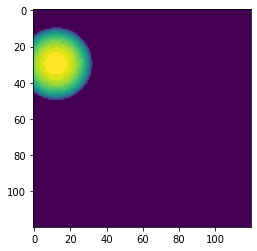

In [119]:
img = np.sum(sm_array,axis=2)
imgplot = plt.imshow(img)

In [120]:
np.sum(img)



30523.0

In [121]:
percent_pixel_1 = np.sum(img[0:int(sm_half_pixels), 0:int(sm_half_pixels)]) / np.sum(img)
percent_pixel_2 = np.sum(img[0:int(sm_number_of_pixels), int(sm_half_pixels):int(sm_number_of_pixels)]) / np.sum(img)
percent_pixel_3 = np.sum(img[int(sm_half_pixels):int(sm_number_of_pixels), 0:int(sm_half_pixels)]) / np.sum(img)
percent_pixel_4 = np.sum(img[int(sm_half_pixels):int(sm_number_of_pixels), int(sm_half_pixels):int(sm_number_of_pixels)]) / np.sum(img)

In [122]:
print("% in first pixel: " + str(percent_pixel_1 * 100) + "%")
print("% in second pixel: " + str(percent_pixel_2 * 100) + "%")
print("% in third pixel: " + str(percent_pixel_3 * 100) + "%")
print("% in fourth pixel: " + str(percent_pixel_4 * 100) + "%")

% in first pixel: 100.0%
% in second pixel: 0.0%
% in third pixel: 0.0%
% in fourth pixel: 0.0%


In [123]:
detector_array[closest_pixel_x,closest_pixel_y]+= percent_in_first_pixel*electrons_per_photon

In [124]:
electrons_pixel_1 = electrons_per_photon * percent_pixel_1
electrons_pixel_2 = electrons_per_photon * percent_pixel_2
electrons_pixel_3 = electrons_per_photon * percent_pixel_3
electrons_pixel_4 = electrons_per_photon * percent_pixel_4
print('number of electrons in pixel 1: ' + str(electrons_pixel_1))
print('number of electrons in pixel 2: ' + str(electrons_pixel_2))
print('number of electrons in pixel 3: ' + str(electrons_pixel_3))
print('number of electrons in pixel 4: ' + str(electrons_pixel_4))

number of electrons in pixel 1: 1500.0
number of electrons in pixel 2: 0.0
number of electrons in pixel 3: 0.0
number of electrons in pixel 4: 0.0
